## Reference
https://www.tensorflow.org/tutorials/keras/classification
https://www.tensorflow.org/tutorials/load_data/numpy#load_numpy_arrays_with_tfdatadataset

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(type(train_images), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


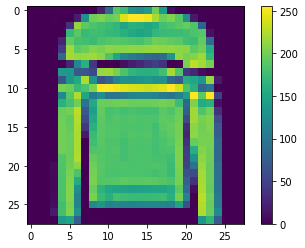

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
SHUFFLE_BUFFER_SIZE = 10000
TRAIN_BATCH_SIZE = 50
VALIDATION_BATCH_SIZE = 10000

validation_ds = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).take(VALIDATION_SAMPLE_SIZE).batch(VALIDATION_BATCH_SIZE)
train_ds = train_dataset.skip(VALIDATION_BATCH_SIZE).batch(TRAIN_BATCH_SIZE).repeat()

In [ ]:
50000/50

1000.0

In [ ]:
steps_per_epoch = 50000 // BATCH_SIZE
validation_steps = 10000 // VALIDATION_BATCH_SIZE


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(
    train_ds,
    epochs=13, steps_per_epoch=steps_per_epoch,
    validation_data=validation_ds,
    validation_steps=validation_steps)

Epoch 1/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.5442 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.4159 - val_sparse_categorical_accuracy: 0.8524
Epoch 2/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8538 - val_loss: 0.3828 - val_sparse_categorical_accuracy: 0.8632
Epoch 3/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.3801 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.8669
Epoch 4/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.3592 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.3682 - val_sparse_categorical_accuracy: 0.8688
Epoch 5/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.3405 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.3452 - val_sparse_categorical_accuracy: 0.8745
Epoch 6/13
1562/1562 [==============================] - 4s 3ms/step - loss: 0.3290 - spars

In [ ]:
for i in train_dataset.take(1):
  print(i)

In [ ]:
BATCH_SIZE = 32


train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).take()


In [ ]:
train_dataset

<BatchDataset shapes: ((None, None, 28, 28), (None, None)), types: (tf.float64, tf.uint8)>

In [ ]:
train